In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode

In [66]:
def findTheta (a,b,c,d):
    theta = np.arctan((np.absolute(a-c))/(np.absolute(b-d)))
    return theta

In [67]:
def rotateLine(xs,ys,theta,a,b):
    nx=[]
    ny=[]
    R = [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]
    for i in range(0,len(xs)):
        A =[xs[i]-a,ys[i]-b]
        xy=np.array(np.matmul(A,R))
        nx.append(xy[0])
        ny.append(xy[1])
    return(nx, ny)

In [68]:
def mainRootArrays(a,b,c,d):
    xs = np.linspace(a,c)
    m=(b-d)/(a-c)
    ys= m*(xs-a)+b
    return(xs,ys)

In [69]:
def findBest(Tmax,G,p,q,a):
    t=0
    bestLength= 1000000000000.0
    bestT = t
    while t >= Tmax:
        b = (q - G * (p**2) - t)/p
        if p>0:
            x =np.linspace(0, p, num=50)
        elif p < 0:
            x =np.linspace(p, 0, num=50)
        lot = np.sqrt(1+(2*G*x + ((q-G*(p**2)-t)/p))**2)
        y= a*(lot) +(1-a)*(lot - t)
        length = scipy.integrate.trapezoid(y,x)
        if length < bestLength:
            #ploting(Tmax,p,q,bestT,G) #comparing possible lines
            bestLength = length
            bestT = t
        t = t - 0.01 #last 
    #ploting(Tmax,p,q,bestT,G)
    #print("length: " + str(bestLength) +" t= " + str(bestT))
    return(bestLength,bestT)

In [86]:
def reAngle(xs, ys, theata, a,b):
    nx =[]
    ny=[]
    R = [[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]
    inR = np.linalg.inv(R)
    ab= [a,b]
    for i in range(0, len(xs)):
        Ap = [xs[i],ys[i]]
        xy=np.array(np.add(np.matmul(Ap,inR),ab))
        print(xy)
        nx.append(xy[0])
        ny.append(xy[1])
    return(nx, ny)

[ 9.99775969 -9.99607945]


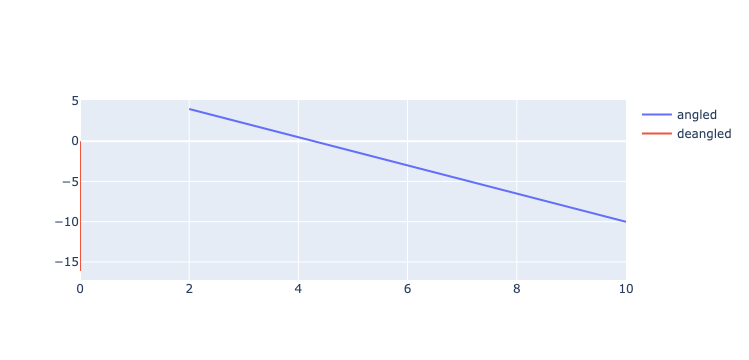

In [88]:
a= 2
b=4
c=10
d=-10
G =.9
al=.9
xy = mainRootArrays(a,b,c,d)
theta = findTheta(a,b,c,d)
nxy = rotateLine(xy[0],xy[1],theta,a,b)
aMain = go.Scatter(x = xy[0], y= xy[1], mode = 'lines', name = "angled")
dMain = go.Scatter(x= nxy[0], y = nxy[1], mode = 'lines', name = "deangled")
tmax = rotateLine([c],[d], theta, a,b)
tmax = tmax[1][0]
pq = rotateLine([5],[-5], theta, 2,4)
p = pq[0][0]
q = pq[1][0]
best = findBest(tmax, G,p,q,a) #returns bestLength and bestT
txy = reAngle([0],[best[1]], theta,a,b)
Array = [aMain, dMain]
iplot(Array)